In [1]:
import random
import string

def generate_random_string(length, characters=string.ascii_letters):
    return ''.join(random.choice(characters).upper() for _ in range(length))

# Example usage:
random_string = generate_random_string(10)
print(random_string)

PNMVRBZVWW


# Brute-force approach

In [2]:
def get_all_substrings(s):
    n = len(s)
    subsequences = []
    for mask in range(1, 1 << n):
        subsequence = ""
        for j in range(n):
            if mask & (1 << j):
                subsequence += s[j]
        subsequences.append(subsequence)

    return subsequences

def palindromic(input):
  for i in range(len(input)//2):
    if input[i] != input[len(input)-i-1]:
      return False
  return True

def bf(X,Y):
  best = ''
  lenght = len(X)
  palindrome = 0
  sub_str_X = get_all_substrings(X)
  sub_str_Y = get_all_substrings(Y)
  for i in sub_str_X:
    if i in sub_str_Y:
      if palindromic(i):
        if len(i) > palindrome:
          palindrome = len(i)
          best = i
  print(best)
  return palindrome

X = "ABCA"
Y = "ABCA"
print("LCPS(X, Y) =", bf(X, Y))

ABA
LCPS(X, Y) = 3


# Two step DP approach

In [3]:
import time

def LCPS(X, Y):
    # Build the dp table for LCS(X, Y)
    n, m = len(X), len(Y)
    dp_1 = [[0]*(m+1) for _ in range(n+1)]

    for i in range(1, n+1):
        for j in range(1, m+1):
            if X[i-1] == Y[j-1]:
                dp_1[i][j] = dp_1[i-1][j-1] + 1
            else:
                dp_1[i][j] = max(dp_1[i-1][j], dp_1[i][j-1])

    # Backtrack to get the LCS string Z ---
    i, j = n, m
    lcs_chars = []
    while i > 0 and j > 0:
        if X[i-1] == Y[j-1]:
            lcs_chars.append(X[i-1])
            i -= 1
            j -= 1
        else:
            if dp_1[i-1][j] > dp_1[i][j-1]:
                i -= 1
            else:
                j -= 1

    # Reverse order
    Z = ''.join(reversed(lcs_chars))
    Z_rev = Z[::-1]

    # Build the dp table for LCS(Z, Z_rev) ---
    k = len(Z)  # Length of the LCS string
    dp_2 = [[0]*(k+1) for _ in range(k+1)]

    for i in range(1, k+1):
        for j in range(1, k+1):
            if Z[i-1] == Z_rev[j-1]:
                dp_2[i][j] = dp_2[i-1][j-1] + 1
            else:
                dp_2[i][j] = max(dp_2[i-1][j], dp_2[i][j-1])

    # Final result: LCPS of (X,Y)
    return dp_2[k][k]


X = "ABCA"
Y = "ABCA"
start_time = time.perf_counter()
print("LCPS(X, Y) =", LCPS(X, Y))
end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

LCPS(X, Y) = 3
Elapsed time: 0.0004 seconds


# Time copmarison

In [8]:
time_log_bf = []
lentgh_bf = []
X = []
Y = []
for a in range(1,18):
  X.append(generate_random_string(a))
  Y.append(generate_random_string(a))

for a in range(len(X)):
  start_time = time.perf_counter()
  lcps = bf(X[a], Y[a])
  end_time = time.perf_counter()
  elapsed_time = end_time - start_time
  lentgh_bf.append(len(X[a]))
  time_log_bf.append(elapsed_time)



R

Y
J
P
Z
Z
F
G
C
T
AA
Z
SYS
KZK


In [5]:
time_log = []
lentgh = []
X = []
Y = []
for a in range(1,4000,50):
  X.append(generate_random_string(a))
  Y.append(generate_random_string(a))

for a in range(len(X)):
  start_time = time.perf_counter()
  lcps = LCPS(X[a], Y[a])
  end_time = time.perf_counter()
  elapsed_time = end_time - start_time
  lentgh.append(len(X[a]))
  time_log.append(elapsed_time)

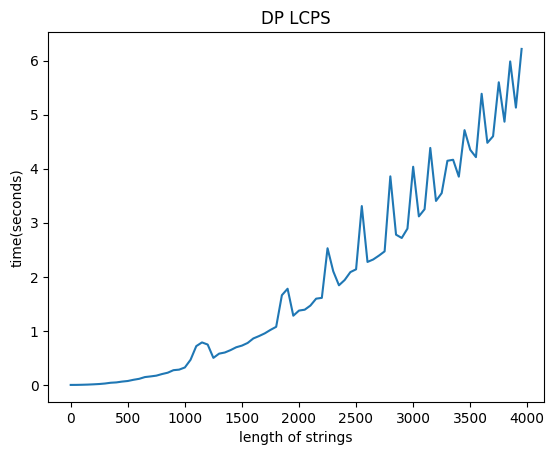

In [14]:
import matplotlib.pyplot as plt
plt.plot(lentgh,time_log)
#plt.plot(lentgh_bf[:14],time_log_bf[:14])
plt.xlabel('length of strings')
plt.ylabel('time(seconds)')
plt.title('DP LCPS')
plt.show()

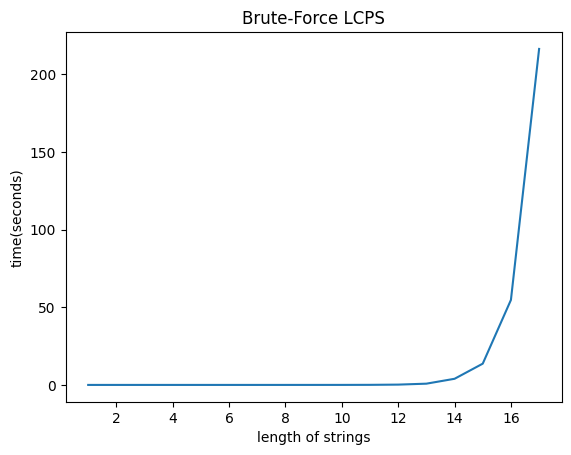

In [16]:
plt.plot(lentgh_bf,time_log_bf)
plt.xlabel('length of strings')
plt.ylabel('time(seconds)')
plt.title('Brute-Force LCPS')
plt.show()